In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from matplotlib.patches import Circle
import cv2

from place_me import run, run_v2

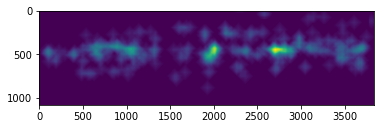

In [2]:
data = np.loadtxt('data/heatmap.txt')
data[data > 2000] = 2000 
data = data / data.max()
# data = data[:, 2000:]
# data = cv2.equalizeHist(data)
plt.imshow(data);

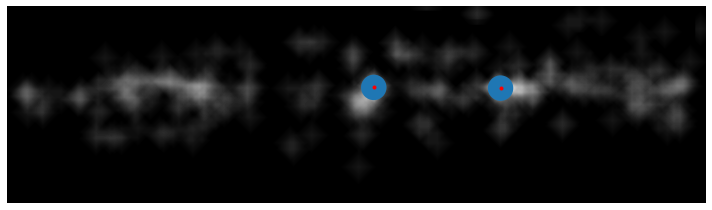

In [3]:
image_max = ndi.maximum_filter(data, size=20, mode='constant')

coordinates = peak_local_max(data, min_distance=140, num_peaks=2)

fig, ax = plt.subplots(figsize=(10, 9))

ax.imshow(data, cmap=plt.cm.gray)
ax.autoscale(False)
ax.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax.axis('off')

for y, x in coordinates:
    circ = Circle((x, y), 70)
    ax.add_patch(circ)

fig.tight_layout()

plt.show()

In [4]:
%env RUST_PRINT=0

arr = np.c_[coordinates, 70 * np.ones(coordinates.shape[0])]
options = {
    'width': data.shape[1],
    'height': data.shape[0],
    'resolution': 2880,
    'pixel_step': 20,
}
[x1, y1, x2, y2] = run_v2(*arr.T, **options)

env: RUST_PRINT=0


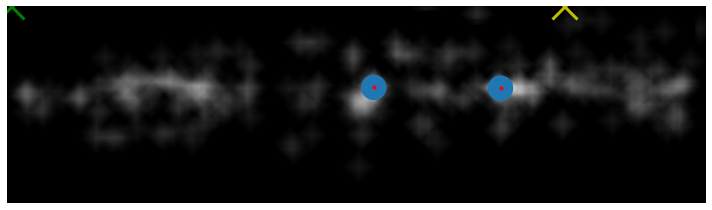

In [9]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.imshow(data, cmap=plt.cm.gray)
ax.autoscale(False)
ax.plot(coordinates[:, 1], coordinates[:, 0], 'r.')
# ax.plot(x1, y1, 'yx', markersize=25, markeredgewidth=3)
# ax.plot(x2, y2, 'gx', markersize=25, markeredgewidth=3)

ax.plot(3060, 0, 'yx', markersize=25, markeredgewidth=3)
ax.plot(20, 0, 'gx', markersize=25, markeredgewidth=3)

ax.axis('off')

for y, x in coordinates:
    circ = Circle((x, y), 70)
    ax.add_patch(circ)

fig.tight_layout()

plt.show()

In [6]:
arr.T

array([[ 449.,  445.],
       [2712., 2015.],
       [  70.,   70.]])

In [7]:
x1, y1, x2, y2

(1220.0, 1080.0, 2380.0, 1080.0)

In [12]:
x=2712, y=449 R=400.0,
hp Point { x: 3110.227134494385, y: 486.61847089384423 }
hp Point { x: 3051.0960349755046, y: 236.83525489872005 }
debug
Ray { origin: Point { x: 3780.0, y: 0.0 }, direction: Vector { x: -0.8090169943749473, y: 0.5877852522924732 } }
Ray { origin: Point { x: 3780.0, y: 0.0 }, direction: Vector { x: -0.9510565162951535, y: 0.3090169943749475 } }

SyntaxError: invalid syntax (1465028434.py, line 1)

In [21]:
np.arctan2(486.61847089384423 - 449, 3110.227134494385 - 2712)

0.0941853667164223

In [24]:
np.arctan2(236.83525489872005 - 449, 3051.0960349755046 - 2712)

-0.5590863276609603

In [20]:
(np.arctan2(236.83525489872005 - 449, 3051.0960349755046 - 2712) * 180 / np.pi) % 2*np.pi

6.178611243080111